# Visualizing the Titanic Disaster

### Introduction:

This exercise is based on the titanic Disaster dataset avaiable at [Kaggle](https://www.kaggle.com/c/titanic).  
To know more about the variables check [here](https://www.kaggle.com/c/titanic/data)


### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Titanic_Desaster/train.csv)

### Step 3. Assign it to a variable titanic 

In [2]:
titanic = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Titanic_Desaster/train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Step 4. Set PassengerId as the index 

In [3]:
titanic.set_index('PassengerId', inplace=True)

### Step 5. Create a pie chart presenting the male/female proportion

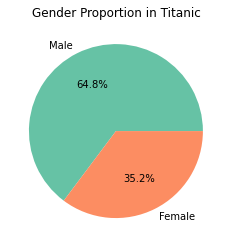

In [4]:
gender = titanic.Sex.value_counts()
slices = [gender[0],gender[1]]
labels = ['Male','Female']

#Colocar outras cores
cs = plt.cm.Set2(np.arange(2))

#Configurações
plt.pie(slices, labels=labels, autopct='%1.1f%%', colors=cs)
plt.title('Gender Proportion in Titanic')
plt.show()

### Step 6. Create a scatterplot with the Fare payed and the Age, differ the plot color by gender

Text(0.5, 1.0, 'Fare payed x Age')

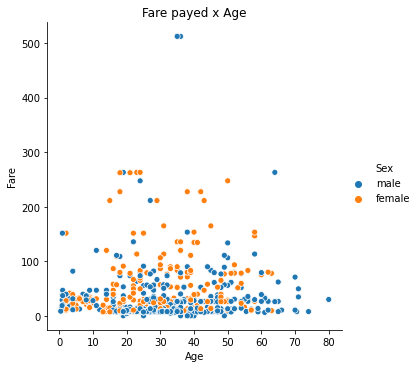

In [5]:
sns.relplot(x='Age',y='Fare',data=titanic, hue='Sex')
plt.title('Fare payed x Age')

### Step 7. How many people survived?

In [6]:
titanic.Survived.sum()

342

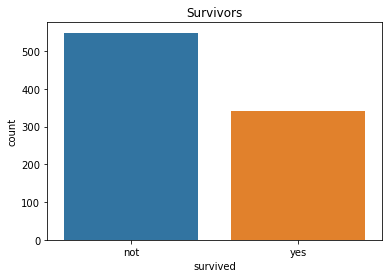

In [7]:
titanic['survived'] = titanic['Survived'].apply(lambda x: 'yes' if x==1 else 'not')
sns.countplot(x='survived', data=titanic)

plt.title('Survivors')
plt.show()

### Step 8. Create a histogram with the Fare payed

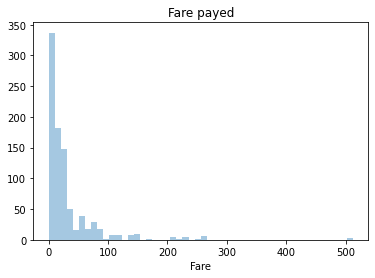

In [8]:
sns.distplot(titanic.Fare, kde=False)

plt.title('Fare payed')
plt.show()

### BONUS: Create your own question and answer it.

### Por faixa de idade, visualizar a razão entre os sobreviventes e os não sobreviventes e a razão entre as diferentes classes por faixa etária

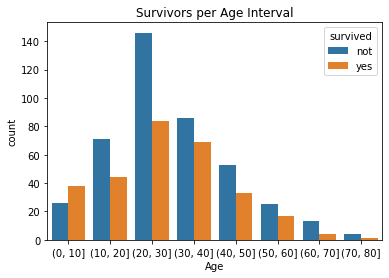

In [9]:
intervals = np.arange(0,81,10)

grouped = pd.cut(titanic.Age, intervals)

sns.countplot(x=grouped, hue='survived', data=titanic)
plt.title("Survivors per Age Interval")
plt.show()

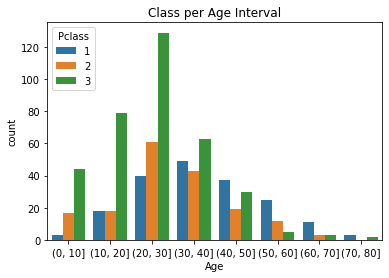

In [10]:
sns.countplot(x=grouped, hue='Pclass', data=titanic)
plt.title("Class per Age Interval")
plt.show()

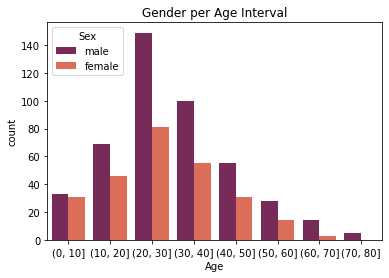

In [18]:
sns.countplot(x=grouped, hue='Sex', palette='rocket',data=titanic)
plt.title("Gender per Age Interval")
plt.show()

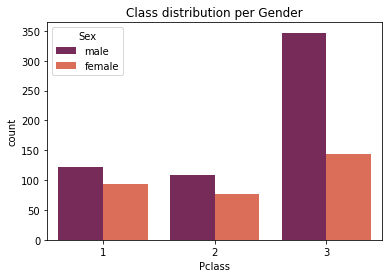

In [20]:
sns.countplot(x='Pclass', hue='Sex', palette='rocket',data=titanic)
plt.title("Class distribution per Gender")
plt.show()